In [183]:
!pip install plotly

In [184]:
import statsmodels.api as sm
import time

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

from statsmodels.formula.api import ols
from datetime import datetime
from geopy.geocoders import Nominatim
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import pingouin
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [185]:
clf = linear_model.LinearRegression()


In [186]:
# get training

df = pd.read_csv('data/clean/zhome_value.csv')
df["year"] = pd.to_datetime(df.year.astype(str)).dt.year

# Split by before and after 2015 


post_airbnb_df = df[df["year"] >= 2015].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] <= 2015].sort_values(by="year", ascending=True)

# post_airbnb_df = df[df["year"] >= 2008].sort_values(by="year", ascending=True)
# pre_airbnb_df = df[df["year"] <= 2008].sort_values(by="year", ascending=True)

In [187]:
pre_airbnb_df.head()

,zipcode,state,city,borough,year,home_value
0,11368,NY,New York,QUEENS,2002,249885.0
1288,11377,NY,New York,QUEENS,2002,323569.0
1287,11223,NY,New York,BROOKLYN,2002,369713.0
1286,11235,NY,New York,BROOKLYN,2002,259932.0
1285,10458,NY,New York,BRONX,2002,199240.0


In [188]:
# home_value = f(year)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf.fit(x_train, y_train)


LinearRegression()

In [189]:

pred = clf.predict(x_train)
mean_error = (abs(pred-y_train)/y_train).mean()
standard_deviation = (abs(pred-y_train)/y_train).std()

print('Training Error:')

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

print('Test Error:')

pred = clf.predict(x_test)
mean_error = (abs(pred-y_test)/y_test).mean()
standard_deviation = (abs(pred-y_test)/y_test).std()

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

Training Error:
Mean Error: 0.4648628419969958
Standard Deviation of Error: 0.43817882538557096
Test Error:
Mean Error: 0.44207545157228534
Standard Deviation of Error: 0.42429713883513537


In [190]:
# print(list(y_train)[:5])
# print(list(x_train)[:5])
# print(list(y_test)[:5])
print(list(x_test)[:5])

[<PandasArray>
[2015]
Length: 1, dtype: int64, <PandasArray>
[2015]
Length: 1, dtype: int64, <PandasArray>
[2015]
Length: 1, dtype: int64, <PandasArray>
[2015]
Length: 1, dtype: int64, <PandasArray>
[2015]
Length: 1, dtype: int64]


In [191]:
# print(list(clf.predict(X_test))[:5])
type(x_test)

pandas.core.arrays.numpy_.PandasArray

In [192]:
x_test.reshape(clf.predict(x_test).shape)

<PandasArray>
[2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
 ...
 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022]
Length: 16577, dtype: int64

In [193]:
clf.predict(x_test).shape

(16577,)

<AxesSubplot: >

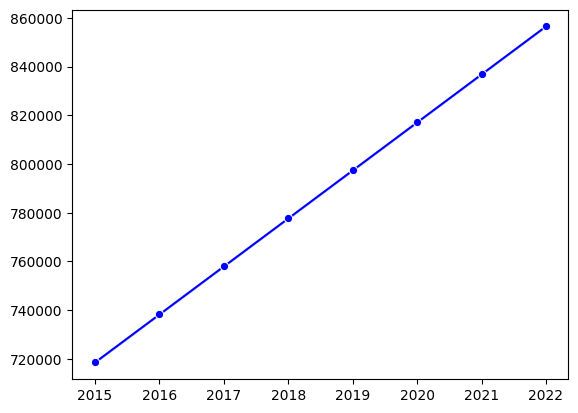

In [194]:
# success :) 
# this is the predictions 
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


In [195]:
home_value_df = df

In [196]:
home_value_df = home_value_df.groupby('year').mean().reset_index()
home_value_df

/var/folders/ht/q4d_vppn3x5d3_p7bs499mdh0000gn/T/ipykernel_14920/1271320138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_value_df = home_value_df.groupby('year').mean().reset_index()


,year,zipcode,home_value
0,2002,10844.331078,388185.197814
1,2003,10859.201878,427488.437141
2,2004,10847.042683,475856.334858
3,2005,10847.042683,563629.120427
4,2006,10833.730055,640005.374812
5,2007,10836.500000,642873.288725
6,2008,10835.700784,645294.235553
7,2009,10818.026807,611269.790330
8,2010,10813.988571,580224.588095
9,2011,10810.965909,595607.424716


<AxesSubplot: xlabel='Year', ylabel='home_value'>

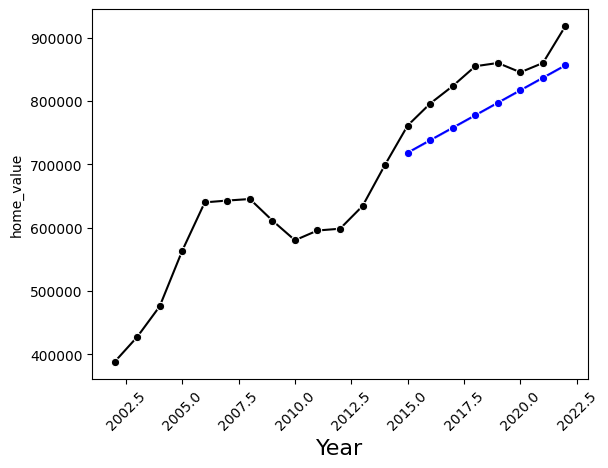

In [197]:
# next step, concatentate with the trend line 

# years_locator = mdates.YearLocator()
# months_locator = mdates.MonthLocator()
# years_format = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()

# ax.xaxis.set_major_locator(years_locator)
# ax.xaxis.set_major_formatter(years_format)
# ax.xaxis.set_minor_locator(months_locator)

rotation = 45
plt.setp(ax.get_xticklabels(), rotation=rotation)
# plt.title('United\'s Financials Through Time', fontsize='18')
plt.xlabel('Year', fontsize='16')

sns.lineplot(y = home_value_df["home_value"], x= home_value_df["year"], color='black', marker='o')
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


<AxesSubplot: xlabel='year', ylabel='home_value'>

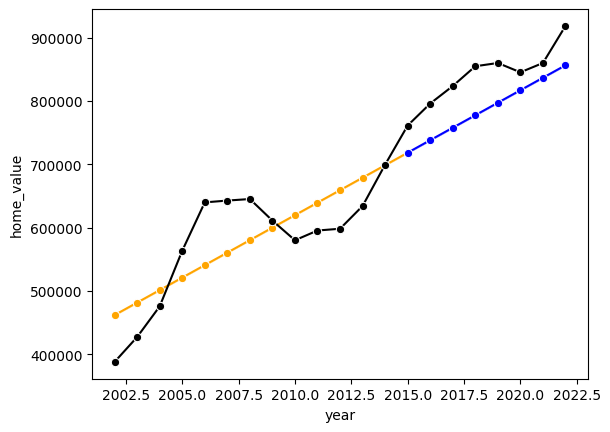

In [200]:
# Split at 2015

post_airbnb_df = df[df["year"] >= 2015].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] <= 2015].sort_values(by="year", ascending=True)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf.fit(x_train, y_train)

sns.lineplot(x = x_train.reshape(clf.predict(x_train).shape), y=list(clf.predict(x_train)), color='orange', marker='o')
sns.lineplot(y = home_value_df["home_value"], x= home_value_df["year"], color='black', marker='o')
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


<AxesSubplot: xlabel='year', ylabel='home_value'>

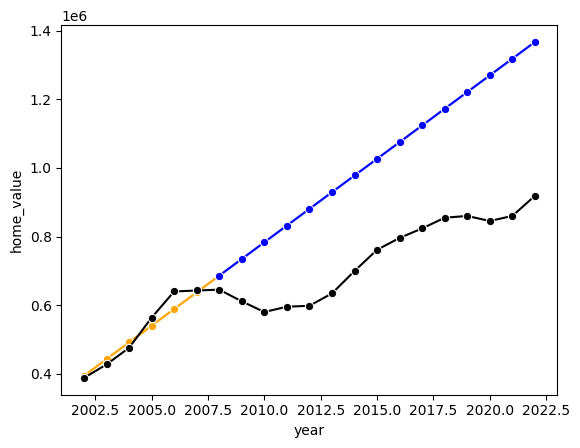

In [199]:
# Split at 2008

post_airbnb_df = df[df["year"] >= 2008].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] <= 2008].sort_values(by="year", ascending=True)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf.fit(x_train, y_train)

sns.lineplot(x = x_train.reshape(clf.predict(x_train).shape), y=list(clf.predict(x_train)), color='orange', marker='o')
sns.lineplot(y = home_value_df["home_value"], x= home_value_df["year"], color='black', marker='o')
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


<AxesSubplot: xlabel='year', ylabel='home_value'>

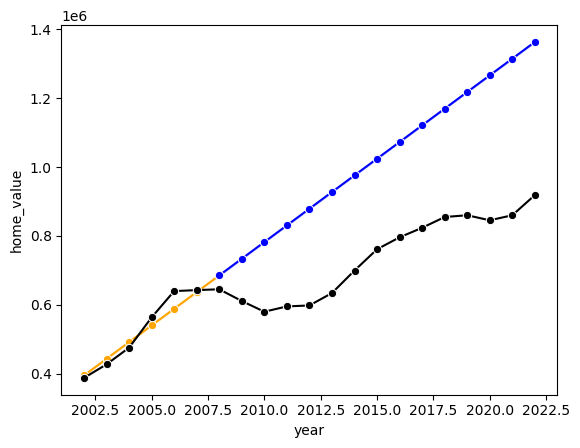

In [240]:
# lasso? 

post_airbnb_df = df[df["year"] >= 2008].sort_values(by="year", ascending=True)
pre_airbnb_df = df[df["year"] <= 2008].sort_values(by="year", ascending=True)

y_train, x_train = pre_airbnb_df["home_value"], pre_airbnb_df["year"].array.reshape(-1, 1)
y_test, x_test = post_airbnb_df["home_value"], post_airbnb_df["year"].array.reshape(-1, 1)

clf = GridSearchCV(linear_model.Lasso(), param_grid={'alpha': np.logspace(-3, 3, 10)})

clf.fit(x_train, y_train)


sns.lineplot(x = x_train.reshape(clf.predict(x_train).shape), y=list(clf.predict(x_train)), color='orange', marker='o')
sns.lineplot(y = home_value_df["home_value"], x= home_value_df["year"], color='black', marker='o')
sns.lineplot(x = x_test.reshape(clf.predict(x_test).shape), y=list(clf.predict(x_test)), color='blue', marker='o')


In [245]:
# add points to data frame 

orange_line = {
    'y': list(clf.predict(x_train)),
    'x': x_train.reshape(clf.predict(x_train).shape),
        }

blue_line = {
    'y': list(clf.predict(x_test)),
    'x': x_test.reshape(clf.predict(x_test).shape),
        }

black_line = {
    "x": home_value_df["year"], 
    "black_y": home_value_df["home_value"]
}

# Create DataFrame
orange_line_df = pd.DataFrame(orange_line).drop_duplicates(ignore_index=True)
blue_line_df = pd.DataFrame(blue_line).drop_duplicates(ignore_index=True)
black_line_df = pd.DataFrame(black_line).drop_duplicates(ignore_index=True)

orange_line_df["x"] = pd.to_datetime(orange_line_df.x.astype(str)).dt.year
blue_line_df["x"] = pd.to_datetime(blue_line_df.x.astype(str)).dt.year
black_line_df["x"] = pd.to_datetime(black_line_df.x.astype(str)).dt.year


display(orange_line_df.head())
display(blue_line_df.head())
display(black_line_df.head())

# combine blue and orange into one line 

orange_and_blue_df = pd.concat([orange_line_df, blue_line_df])


,y,x
0,395355.166838,2002
1,443725.661124,2003
2,492096.155409,2004
3,540466.649695,2005
4,588837.143980,2006


,y,x
0,685578.132551,2008
1,733948.626837,2009
2,782319.121122,2010
3,830689.615407,2011
4,879060.109693,2012


,x,black_y
0,2002,388185.197814
1,2003,427488.437141
2,2004,475856.334858
3,2005,563629.120427
4,2006,640005.374812


In [248]:
plot_df = pd.merge(orange_and_blue_df, black_line_df, on='x')
plot_df["diff"] = plot_df["y"] - plot_df["black_y"] 
plot_df

,y,x,black_y,diff
0,3.953552e+05,2002,388185.197814,7169.969025
1,4.437257e+05,2003,427488.437141,16237.223983
2,4.920962e+05,2004,475856.334858,16239.820552
3,5.404666e+05,2005,563629.120427,-23162.470732
4,5.888371e+05,2006,640005.374812,-51168.230832
5,6.372076e+05,2007,642873.288725,-5665.650460
6,6.855781e+05,2008,645294.235553,40283.896998
7,6.855781e+05,2008,645294.235553,40283.896998
8,7.339486e+05,2009,611269.790330,122678.836506
9,7.823191e+05,2010,580224.588095,202094.533027
